The idea of the function work:

- The score will be calculated by how many times the top N word appear multiplied by the frequency of it in the whole language
- The score will be divided by occurrence of the top N words in the article

In [2]:
def lang_confidence_score(word_counts, language_words_with_frequency):
    # I suppose that language_words_with_frequency is a list of lists of 2 elements (word and frequency)
    score = 0
    for word , freq in language_words_with_frequency:
        count_in_text = word_counts.get(word,0)
        score += count_in_text * freq
    sum = 0
    for word , count in word_counts.items():
        sum += count
    return score/sum

I choose english (the language which was used for writing pokemon wiki) , french and spanish


In [3]:
import wordfreq
def get_top_words(number):
    # we take the top n words from each language
    ListOfWordsInEnglish = wordfreq.top_n_list(n = number , lang= 'en')
    ListOfWordsInFrench = wordfreq.top_n_list(n = number , lang='fr')
    ListOfWordsInSpanish = wordfreq.top_n_list(n = number , lang= 'es')
    ListOfWordsInEnglishWithFreq = []
    ListOfWordsInFrenchWithFreq = []
    ListOfWordsInSpanishWithFreq = []
    # then we create the pair of [word , frequency] for each language
    for i in range(number):
        ListOfWordsInEnglishWithFreq.append([
            ListOfWordsInEnglish[i],
            wordfreq.word_frequency(ListOfWordsInEnglish[i], lang='en')
        ])
        ListOfWordsInFrenchWithFreq.append([
            ListOfWordsInFrench[i],
            wordfreq.word_frequency(ListOfWordsInFrench[i], lang='fr')
        ])
        ListOfWordsInSpanishWithFreq.append([
            ListOfWordsInSpanish[i],
            wordfreq.word_frequency(ListOfWordsInSpanish[i], lang='es')
        ])
    return [ListOfWordsInEnglishWithFreq, ListOfWordsInFrenchWithFreq, ListOfWordsInSpanishWithFreq]

In [8]:
from WikiClasses.wiki_scraper_class import Scraper
import json

dictionary = []
# we take all dict from all article
def get_count_word(phrase , use_local=False , URL = None):
    if not use_local:
        object = Scraper(URL)
    else:
        object = Scraper(use_local_html_file_instead=True)
    if not object.count_words(phrase):
        print("Nie powiódł się count-words")
        raise Exception
    with open("./word-count.json" , 'r' , encoding='utf-8') as file:
        word_count = json.load(file)
    count = 0
    for word in word_count:
        count += word_count[word]
    return word_count
# now we do the get_count_word function to selected articles
dictionary.append(get_count_word('Team Rocket', use_local=True))
dictionary.append(get_count_word('Kingdom location', use_local=False, URL ="https://bulbapedia.bulbagarden.net/wiki"))
dictionary.append(get_count_word('Aya (Conquest)', use_local=False, URL ="https://bulbapedia.bulbagarden.net/wiki"))
dictionary.append(get_count_word('Charles de Gaulle', use_local=True))
dictionary.append(get_count_word('Da Vinci', use_local=True))

In [9]:
k = [3 , 10 , 100 , 1000]

In [10]:
freqs = get_top_words(k[-1])
scores = []
for k_val in k:
    # we calculate each score for every article in every langauge
    en_scores_k = []
    fr_scores_k = []
    es_scores_k = []
    for word_dict in dictionary:
        en_scores_k.append(lang_confidence_score(word_dict, freqs[0][:k_val]))
        fr_scores_k.append(lang_confidence_score(word_dict, freqs[1][:k_val]))
        es_scores_k.append(lang_confidence_score(word_dict, freqs[2][:k_val]))
    scores.append([
        en_scores_k,
        fr_scores_k,
        es_scores_k
    ])

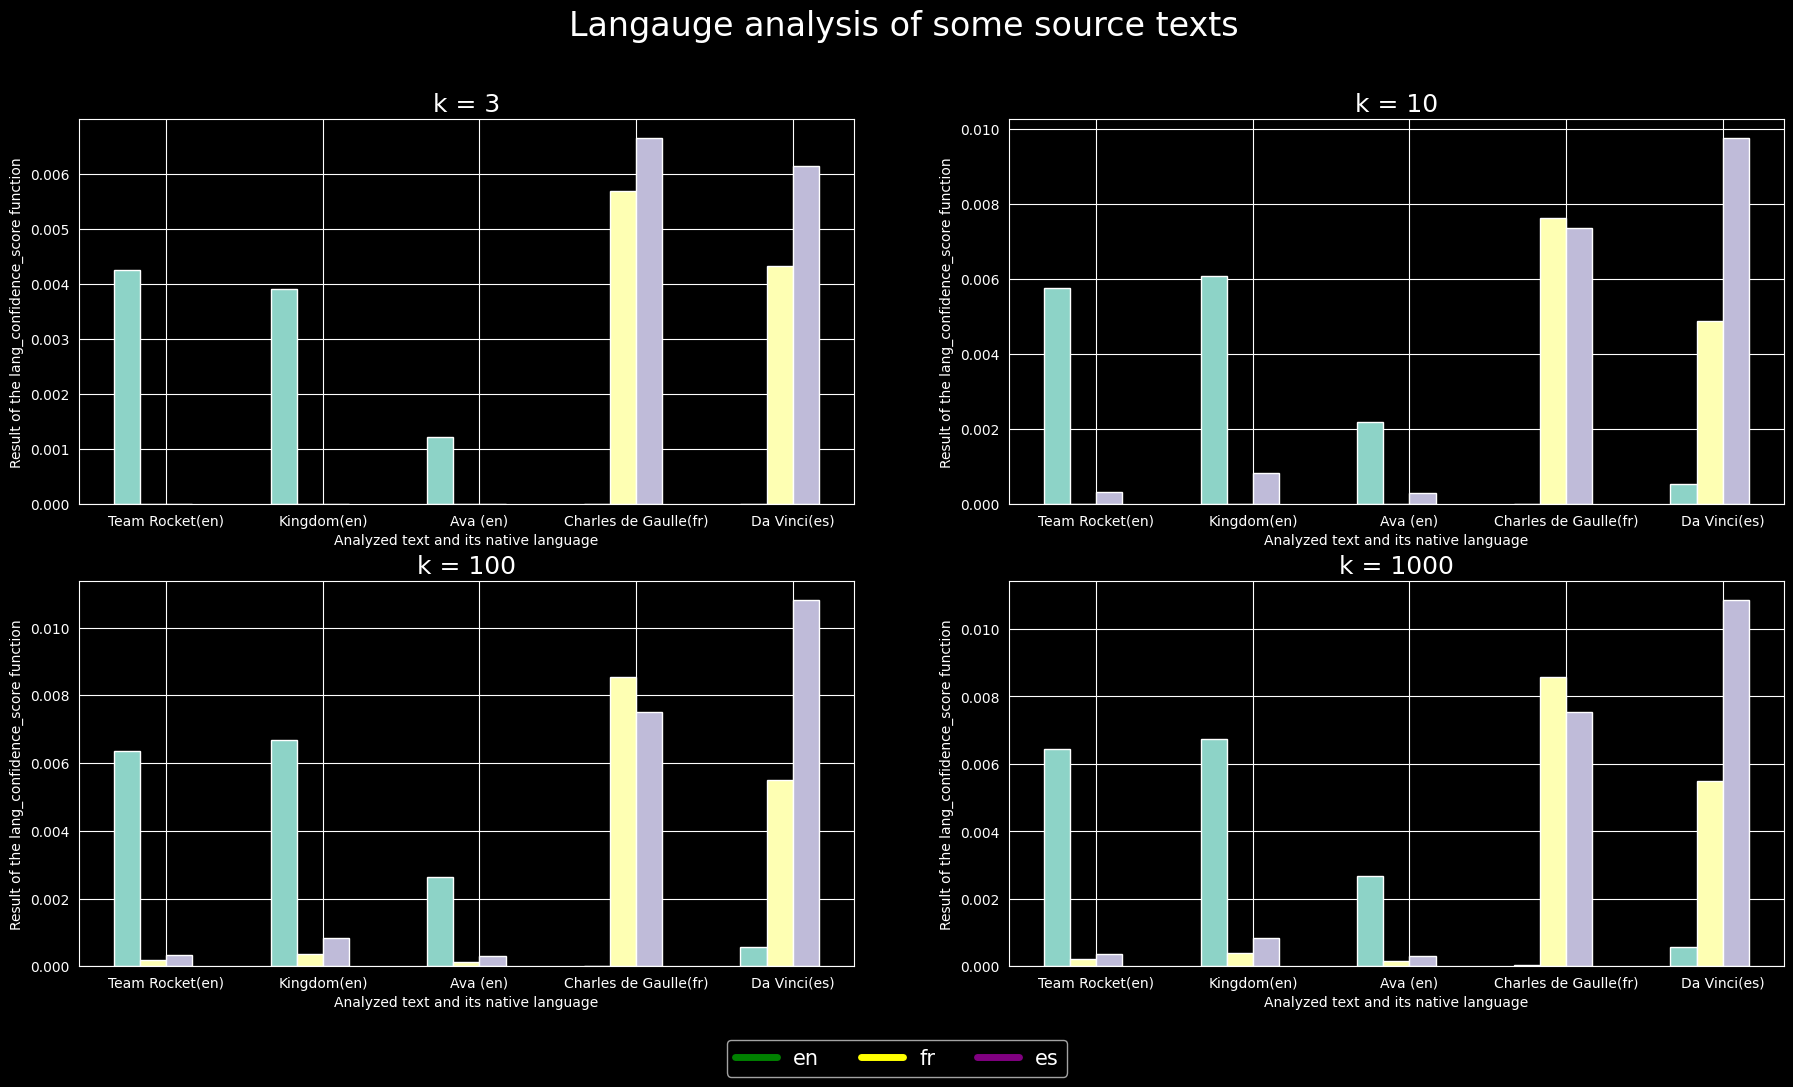

In [17]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
# we crate the plots
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(22, 11)
fig.suptitle("Langauge analysis of some source texts", fontsize=24)
# creating a legend
legend_elements = [
    Line2D([0], [0], color="green", lw=5, label="en"),
    Line2D([0], [0], color="yellow", lw=5, label="fr"),
    Line2D([0], [0], color="purple", lw=5, label="es")
]
fig.legend(handles=legend_elements, loc="lower center", ncol=3, fontsize=15)

# setting the bar width and index label
width_cluster = 0.5
width_bar = width_cluster / 3
index = ["Team Rocket(en)", "Kingdom(en)", "Ava (en)", "Charles de Gaulle(fr)", "Da Vinci(es)"]

x = np.arange(len(index))
# we create for each window a plot
for axs_no in range(4):
    axs[axs_no // 2, axs_no % 2].set_title(f"k = {k[axs_no]}", fontsize=18)
    axs[axs_no // 2, axs_no % 2].set_xlabel("Analyzed text and its native language")
    axs[axs_no // 2, axs_no % 2].set_ylabel("Result of the lang_confidence_score function")
    for n in range(3):
        x_pos = x + (width_bar * n) - width_cluster / 2
        axs[axs_no // 2, axs_no % 2].bar(x_pos, scores[axs_no][n], width_bar, align="edge", tick_label=index)

# Conclusions:

- It can be observed that the function reflects the texts well.
After looking at each of the plots, it can be concluded that the French language, in terms of the most frequent words, is similar to Spanish.
- It is visible that the article with the smallest amount of English content received a low score, while the article with the largest amount of Spanish content achieved the highest score.
- It can also be seen that for the article about Charles de Gaulle, the French and Spanish language indicators are almost equal.
- Additionally, the Spanish language indicator for the Charles de Gaulle article slightly increases for k = 3 compared to k = 1000.

# Summary:

The choice of language matters because French and Spanish use many similar words, unlike English, which may overlap with French to some extent, but at the level of the top 1000 words their intersection is close to empty.